# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\achow\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


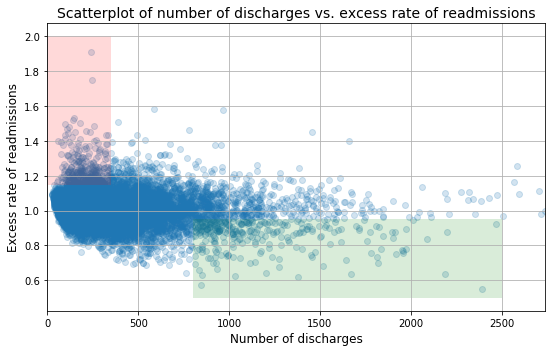

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
#Your Turn

# Question: Do you agree with the above analysis and recommendations? Why or why not?
Answer: The report provides two analysis which can be tested statistically.
There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

Small hospitals (number of discharges less than 100) have lesser excess readmission rates as compared to larger hospitals (number of discharges > 1000)

We can perform a correlation and a linar regression to test the statement. The second statement can be evaluated by performing a independent (2-sample) t-test.

We can create a dataframe for small hospitals(s_hosp) having number of discharges less than(<)100. Number of discharges= 0 are neglected in our analysis.

In [9]:
import seaborn as sns
import numpy as np
import scipy
import math
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [10]:
df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0].dropna(subset=['Excess Readmission Ratio'])


In [11]:
# rename table to lessen the amount of typing I need to do
df = clean_hospital_read_df
print("shape: " + str(df.shape))
# see fields and their content
df.head()

shape: (11578, 12)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [12]:
# missing values in metric of interest seems to exist
rows_post_clean = len(df)
len(df)-df.count()

df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate',
                  'Expected Readmission Rate','Number of Readmissions'], inplace=True)
print("The impact seems small with %3.0f (of %3.0f; +/- %3.3f%%) rows being removed. " 
      % (rows_post_clean-len(df), rows_post_clean, (rows_post_clean-len(df))/float(rows_post_clean)*100))
print("Removing the null values also removed the zero-value discharges, 
      the new lowest number of discharges is %.f." % df['Number of Discharges'].min())


The impact seems small with  81 (of 11578; +/- 0.700%) rows being removed. 
Removing the null values also removed the zero-value discharges, the new lowest number of discharges is 25.


# A. Initial observations based on the plot above
Let us look at the distribution of the data and the scatterplot once again.

Overall, rate of readmissions is trending down with increasing number of discharges?

I don't really agree with this inference after looking at the plot. The scatter plot doesn't easily lend itself 
to determining if there is a decreasing trend. We should probably do a regression analysis to find such a trend.


Slope for the linear regression line :  -0.026629057843191646


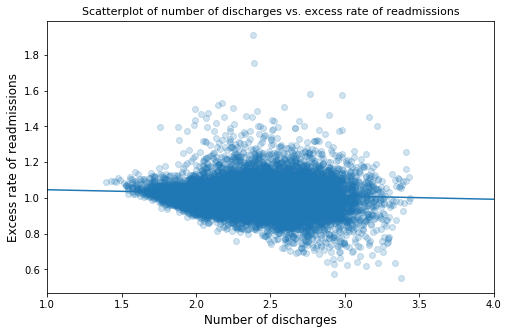

In [13]:
def ols(x_t, y_t):
    mean_x = np.average(x_t)
    var_x = np.var(x_t)
    mean_y = np.average(y_t)
    slope = (np.cov(x_t, y_t)[0][1]) / var_x
    intercept = mean_y - slope * mean_x
    return slope, intercept

slope, inter = ols(np.log10(x), y)
fitx = [1, 4]
fity = [inter + slope, inter + slope*3]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(np.log10(x), y,alpha=0.2)
ax.plot(fitx, fity)
ax.set_xlim(1,4)
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=11)
print( "Slope for the linear regression line : ", slope)

We see there is indeed a marginal decreasing trend but we cannot say for sure if this trend is significant or not. The trend could be due to the presence of missing values or outliers in the data. We should come up with significance tests to confirm such a hypothesis.


# Density Plot Revealing More Information
A scatter plot is useful in showing the relationship between two continuous variables. 
Although the scatter plot above uses translucency to lessen the problem of overplotting, 
there is still a large number of hospitals that have fewer than 1000 dischrages and 
overlap completely. At the same time, a few outlier hospitals have more than 3500 discharges.

To have a better view of the data and to draw the outliers closer to the median, we can use
the logarithm of the number of discharges instead. We will also use a density plot to 
reveal more information about the distribution of hospitals in terms of the number of 
discharges and excess readmission ratio.

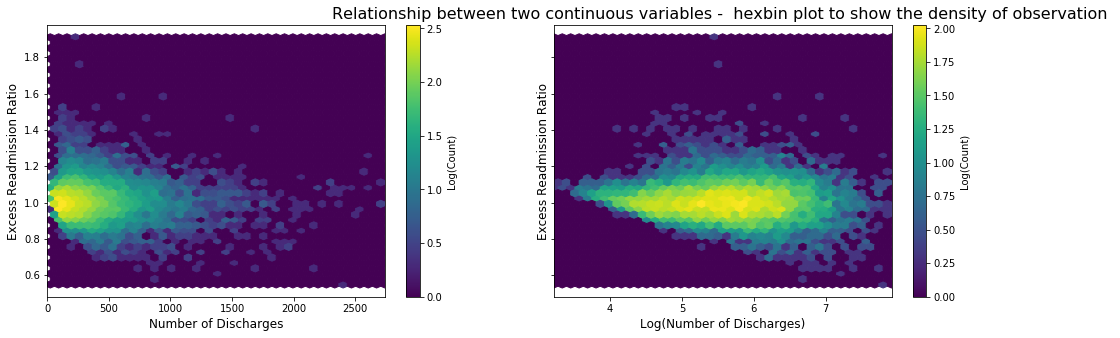

In [14]:
# Create a hexbin plot to show the density of observations
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=40, bins='log')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Excess Readmission Ratio', fontsize=12)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Log(Count)')

logx = np.log(x)
ax = axs[1]
hb = ax.hexbin(logx, y, gridsize=40, bins='log')
ax.set_xlim([min(logx), max(logx)])
ax.set_xlabel('Log(Number of Discharges)', fontsize=12)
ax.set_ylabel('Excess Readmission Ratio', fontsize=12)
ax.set_title('Relationship between two continuous variables -  hexbin plot to show the density of observation ', fontsize=16)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Log(Count)')

C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


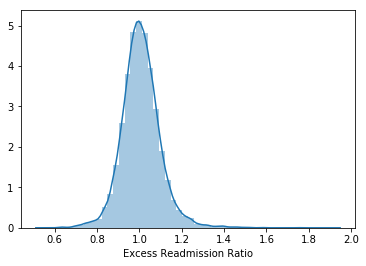

In [15]:
sns.distplot(df['Excess Readmission Ratio'].dropna())


In contrast, the excess readmission ratio is normally distributed as a result of the CLT.
Overall, rate of readmissions is trending down with increasing number of discharges


C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


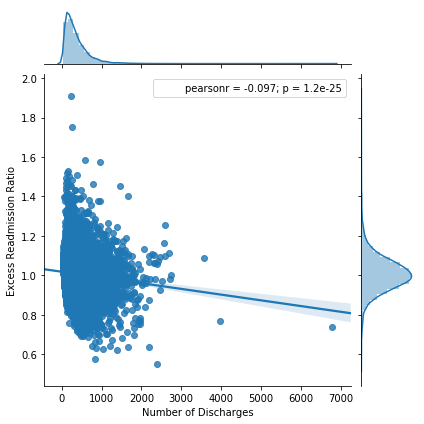

In [17]:
sns.jointplot(data=df, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg')


Conclusion:
The near zero PearsonR Score indicates that there is no correlation between the Excess Readmission Ratio and Number of Discharges. The apparent correlation might be a result of the skew in the number of discharges.


In [18]:
import scipy.stats as stats
corr = stats.pearsonr(x,y)
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))


The Pearson correlation coefficient: -0.09309554287590441
The p-value of a two-tailed test: 1.5022756426464526e-23


# Evidence of Negative but Low Correlation
The Pearson correlation coefficient is -0.09, suggesting a negative but small correlation 
between the number of discharges and excess readmission ratio. The p-value of the 
correlation test is less than 1%, so this negative relationship is indeed statistically 
significant. However, since the correlation is so small, it is not practical to assume 
that hospitals with smaller number of dischrages will always have a higher excess 
readmission ratio. As a result, I will not recommend that 
hospitals with smaller capacity be required to upgrade their resources or facilities.

# Investigating initial observation claims

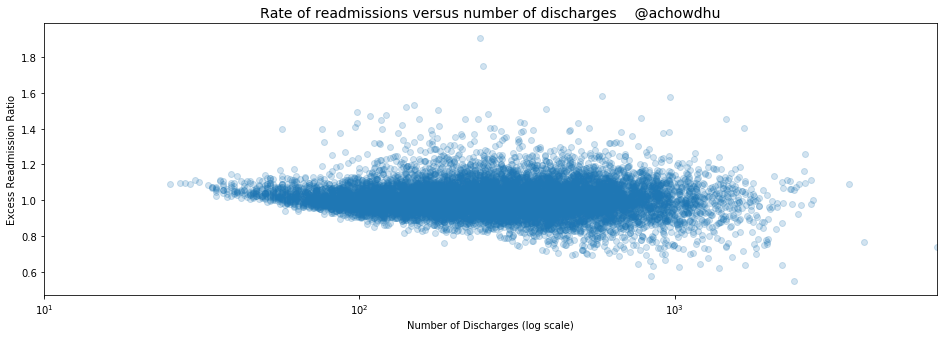

In [19]:
# testing statement: "Overall, rate of readmissions is trending down with increasing number of discharges"
x = df['Number of Discharges']
y = df['Excess Readmission Ratio']

fig, ax = plt.subplots(figsize=(16,5))
ax.scatter(x, y, alpha=0.2)
ax.set_xscale('symlog')
ax.set_xlim([10, max(x)])
plt.title('Rate of readmissions versus number of discharges    @achowdhu', fontsize=14)
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Number of Discharges (log scale)')
plt.show()



Based on the chart above, there is no evidence of an inverse relationship between the excess readmission ratio and the number of discharges.
2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
Let us first look at how the Number of Discharge varies in the dataset


C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


DescribeResult(nobs=11497, minmax=(25, 6793), mean=365.4662085761503, variance=95329.39693128322, skewness=3.0725239010098413, kurtosis=25.676790101960464)
Mean: 365.4662085761503, Standard Deviation: 308.75459013799815


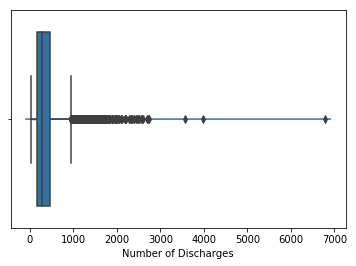

In [20]:
mean_discharge = df['Number of Discharges'].mean()
sns.distplot(df['Number of Discharges'])
sns.boxplot(df['Number of Discharges'])

desc = scipy.stats.describe(df['Number of Discharges'])
print(desc)
std = math.sqrt(desc[3])
mean = desc[2]
print('Mean: {}, Standard Deviation: {}'.format(mean, std))

Let us plot a trend on the data points that are in a 95% Confidence Interval - upto two standard deviations either side of the mean


C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


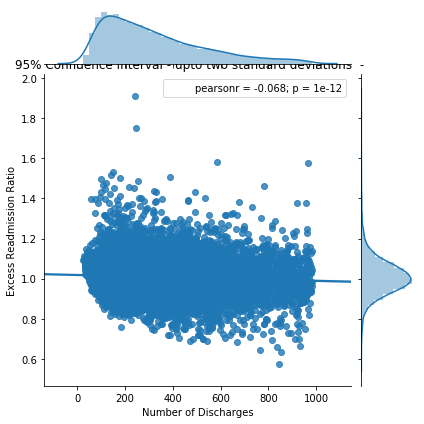

In [22]:
df_ = df[(df['Number of Discharges'] <= mean + (2 * std)) & (df['Number of Discharges'] >= mean - (2 * std))]
ax = sns.jointplot(data=df_, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg')
_ = ax.ax_joint.set_title('95% Confidence Interval - upto two standard deviations  -    ')


The distribution of the Number of Discharges has a clear skew - is not normally distributed. The dataset has a mean of 365 and a huge variance of 95329. The observed trend might simply be a result of the lack of data points on the observations with higher number of discharges. Our 95% confidence interval also shows that there is no significat observable trend between number of discharges and readmissions


# B. Statistics
Investigating statistical claims

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [23]:
# filter datasets
df_100 = df[df['Number of Discharges'] < 100]
df_1000 = df[df['Number of Discharges'] > 1000]

# proportion of hospitals/facilities with certain number sized of discharges
n = len(df['Number of Discharges'])
discharges_100 = float(len(df_100))
discharges_1000 = float(len(df_1000))
discharges_inbetween = n - discharges_100

print("%5s %18s %10s" % ('measurement', 'value', 'frequency'))
print(42 * "-")
print("%5s %11.0f %8.2f%%" % ('discharges <  100', discharges_100, discharges_100/n*100)) 
print("%5s %8.0f %7.2f%%" % ('discharges in between', discharges_inbetween, discharges_inbetween/n*100)) 
print("%5s %10.0f %8.2f%%" % ('discharges <1,000', discharges_1000, discharges_1000/n*100)) 
print("%5s %13.0f %5.0f%%" % ('total discharges', n, 100)) 
print(42 * "-")
print(42 * " ")

measurement              value  frequency
------------------------------------------
discharges <  100        1188    10.33%
discharges in between    10309   89.67%
discharges <1,000        463     4.03%
total discharges         11497   100%
------------------------------------------
                                          


In [24]:
#test findings < 100
mean_lt_100 = df_100['Excess Readmission Ratio'].mean()
perc = float(len(df[(df['Number of Discharges'] <100) & 
                    (df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio'])) / discharges_100

print("Findings for Discharges <100")
print(42 * "-")
print("%5s %11.3f" % ('mean for less than 100', mean_lt_100)) 
print("%5s %11.2f%%" % ('perc                  ', perc*100)) 
print(42 * "-")
print(42 * " ")

Findings for Discharges <100
------------------------------------------
mean for less than 100       1.023
perc                         63.22%
------------------------------------------
                                          


In [25]:
#test findings > 1000
mean_gt_1000 = df_1000['Excess Readmission Ratio'].mean()
perc = float(len(df[(df['Number of Discharges'] >1000) 
                    & (df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio'])) / discharges_1000

print("Findings for Discharges >1000")
print(42 * "-")
print("%5s %11.3f" % ('mean greater than 1000', mean)) 
print("%5s %11.2f%%" % ('perc                 ', perc*100)) 
print(42 * "-")

Findings for Discharges >1000
------------------------------------------
mean greater than 1000     365.466
perc                        44.49%
------------------------------------------


In hospitals/facilities with # of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1                                                                     
In hospitals/facilities with # of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [26]:
def compute_lt_statistic(split_at):
    discharge_lt = df[df['Number of Discharges'] < split_at]['Excess Readmission Ratio']
    mean_discharge_lt = discharge_lt.mean()
    percent_discharge_lt = len(discharge_lt[discharge_lt > 1])/float(len(discharge_lt))
    return mean_discharge_lt, percent_discharge_lt, len(discharge_lt)

def compute_gt_statistic(split_at):
    discharge_gt = df[df['Number of Discharges'] > split_at]['Excess Readmission Ratio']
    mean_discharge_gt = discharge_gt.mean()
    percent_discharge_gt = len(discharge_gt[discharge_gt > 1])/float(len(discharge_gt))
    return mean_discharge_gt, percent_discharge_gt, len(discharge_gt)



split_at = 100
print( 'Splits at {}:'.format(split_at))
print( 'LT: {}'.format(compute_lt_statistic(split_at)))
print( 'GT: {}'.format(compute_gt_statistic(split_at)))
print()

split_at = mean
print( 'Splits at Mean {}:'.format(split_at))
print( 'LT: {}'.format(compute_lt_statistic(split_at)))
print( 'GT: {}'.format(compute_gt_statistic(split_at)))
print()



split_at = np.median(df['Number of Discharges'])
print( 'Splits at Mode {}'.format(split_at))
print( 'LT: {}'.format(compute_lt_statistic(split_at)))
print( 'GT: {}'.format(compute_gt_statistic(split_at)))
print()


Splits at 100:
LT: (1.0226183501683506, 0.6321548821548821, 1188)
GT: (1.0057676562195774, 0.5035039906560249, 10274)

Splits at Mean 365.4662085761503:
LT: (1.0130625825082493, 0.5316281628162817, 7272)
GT: (0.9979360710059201, 0.4906508875739645, 4225)

Splits at Mode 282.0
LT: (1.0145051670146121, 0.5382741823242867, 5748)
GT: (1.0003550959860374, 0.49476439790575916, 5730)



We can see that the split at 100 discharges is unfair since there are an order of magnitude more data points in the > 100 group. A more fair split would be to split at the mean/median. Such splits do not give any evidence that there is a significant difference in the readmission rates between lower and higher number of discharges groups.


# C. Conclusions
Investigating correlation claim

Q: There is a significant correlation between hospital capacity (number of discharges) and readmission rates.



In [27]:
df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000



We have just seen that there is nearly zero correlation between number of discharges and readmission rates. Any apparenet correlation is a result of the skew in our underlying dataset.

A correlation of -0.1 points to a very weak downward (negative) linear relationship between discharges and admission ratio. A correlation of 1 or -1 would point to a perfect liniear relationsip, while zero would point to no linear relationship. So the claim that "There is a significant correlation between hospital capacity (number of discharges) and readmission rates" does not hold.

Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
This is purely conjecture. Firstly, it is based on the unproven assumption that smaller hospitals have higher readmissions than larger hospitals. Secondly, there could be a whole host of reasons why this might be true including geographical, demographic, natural disasters and other factors not related to the quality of care.


Further Analysis and Recommendation
Hospital readmissions have been used as indciators of poor quality of care, 
such as inadequate discharge planning and care coordination. The goal of the 
Hospital Readmissions Reduction Program is to reduce such unnecessary and avoidable readmissions.

The initial report suggests taht hospitals with smaller number of discharges tend to have a higher 
excess readmission ratio. But it does not report the correlation coefficient or test whether 
the correlation is statistically significant. To improve the analysis, I will compute the 
Pearson correlation coefficient and conduct a hypothesis testing at 1% significance level, with the 
null hypothesis being zero correlation between the number of discharges and excess readmission ratio.

# D. Regulatory policy recommendations

Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

Investigating recommendations

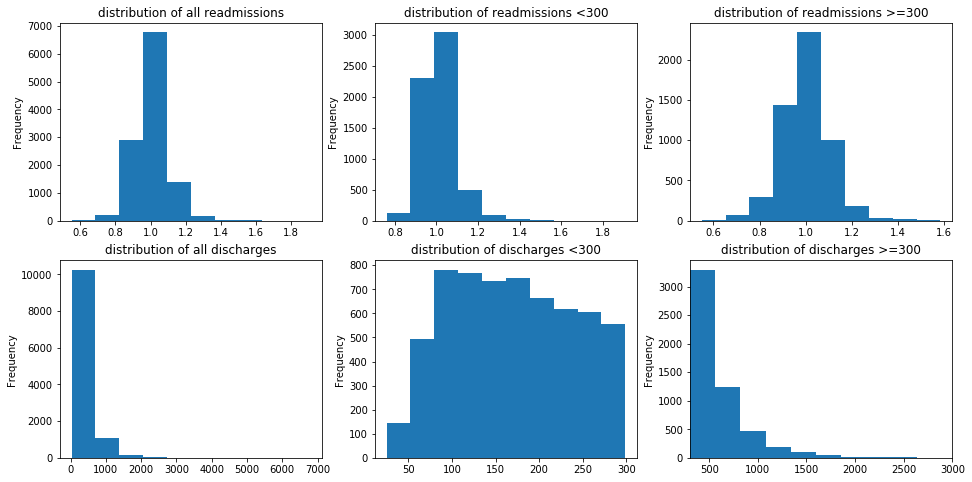

In [29]:
# Getting a better sense of the distribution of readmissions and discharges
plt.subplots(figsize=(16,8))
# all
plt.subplot(2, 3, 1)
df['Excess Readmission Ratio'].plot(kind='hist', title='distribution of all readmissions')
plt.subplot(2, 3, 4)
df['Number of Discharges'].plot(kind='hist', title='distribution of all discharges')

# filter datasets
df_l300 = df[df['Number of Discharges'] < 300]
df_g300 = df[(df['Number of Discharges'] >= 300)]

# <300
plt.subplot(2, 3, 2)
df_l300['Excess Readmission Ratio'].plot(kind='hist', title='distribution of readmissions <300')
plt.subplot(2, 3, 5)
df_l300['Number of Discharges'].plot(kind='hist', title='distribution of discharges <300')

# >=300
plt.subplot(2, 3, 3)
df_g300['Excess Readmission Ratio'].plot(kind='hist', title='distribution of readmissions >=300')
plt.subplot(2, 3, 6)
# the limit leed to cutting off three records on the right tail but brings the distribution into focus
df_g300['Number of Discharges'].plot(kind='hist', bins=25, title='distribution of discharges >=300').set_xlim([300, 3000]);


The distribution of readmissions for hospitals with discharges less than 300 seems quite similar to those with 300 or more discharges. And to be honest, the means value of 1.023 for hospitals with less than 100 discharges and 0.978 for hospitals with more than 1,000 discharges are both within 0.23 of the threshold value of 1. So the point about larger hospitals leading to better outcomes feels a bit weak.

In [30]:
split_at = 300
print( 'Splits at {}:'.format(split_at))
print( 'LT: {}'.format(compute_lt_statistic(split_at)))
print( 'GT: {}'.format(compute_gt_statistic(split_at)))
print()
diff_read = compute_lt_statistic(split_at)[1] - compute_gt_statistic(split_at)[1]
print( 'Difference in Readmission Rates: {}'.format(abs(diff_read)))


Splits at 300:
LT: (1.0142382121807445, 0.5374918140144074, 6108)
GT: (0.9997810438024227, 0.492264678471575, 5365)

Difference in Readmission Rates: 0.045227135542832364


The choice of small capacity to be < 300 seems completely arbitrary. Also, we see that the difference in readmission ratio between hospitals lesser than and greater than 300 admissions is only 0.045, which we will later prove is statistically insignificant. Therefore, there is no reason for small capacity hospitals

Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. Once again, there is no evidence to support this claim. Our correlation is flawed and by extension, this recommendation is unfounded.


Provide support for your arguments and your own recommendations with a statistically sound analysis:
Let us look at the difference in readmission ratios between small (< 300) and large capacity hospitals.

H0: There is a difference in readmission ratios between small (< 300) and large capacity hospitals
H1: There is NO difference in readmission ratios between small (>= 300) and large capacity hospitals
Test Statistic: Mean of Difference in Readmission Ratios CI: 95%

In [32]:
df_small = df[df['Number of Discharges'] < 300]
df_large = df[df['Number of Discharges'] >= 300]
print( len(df_small), len(df_large))
df_small_mean = df_small['Excess Readmission Ratio'].mean()
df_large_mean = df_large['Excess Readmission Ratio'].mean()
diff_mean = abs(df_small_mean - df_large_mean)
print( 'Difference in Mean between small and large hospitals: {}'.format(diff_mean))

6108 5389
Difference in Mean between small and large hospitals: 0.014367364156993245


# Let us now find the proability of getting a similar difference of means from our population, ignoring hospital size 


In [33]:
def run_simulation(data, iters=10000):
    size = int(len(data)/2.0)
    res = []
    for i in range(iters):
        dat = data.values
        np.random.shuffle(dat)
        splits = dat[:size], dat[size:]
        res.append(abs(splits[0].mean() - splits[1].mean()))
    return res

iterations = 10000
sample_means = run_simulation(df['Excess Readmission Ratio'], iterations)

p_val = sum([1 for x in sample_means if x >= diff_mean])/float(iterations)
print(p_val)

0.0


In [37]:

alpha = 0.05
if p_val < alpha:
    print("The null hypothesis - H0: There is a difference in readmission ratios between small 
          (< 300) and large capacity hospitals - can be rejected")
else:
    print("The null hypothesis - H1: There is NO difference in readmission ratios between small 
          (>= 300) and large capacity hospitals - cannot be rejected")


The null hypothesis - H0: There is a difference in readmission ratios between small (< 300) and large capacity hospitals - can be rejected


C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


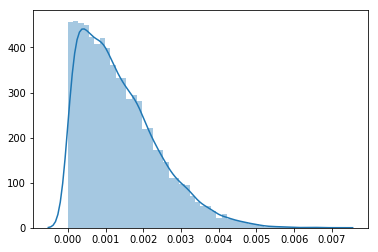

In [39]:
sns.distplot(sample_means)


In [40]:
mean_stats = scipy.stats.describe(sample_means)
mean, std = mean_stats[2], math.sqrt(mean_stats[3])
ci = scipy.stats.norm.interval(0.95, loc=mean, scale=std)
print( '95% Confidence Interval: {}'.format(ci))
print( 'Mean: {}, Standard Error: {}'.format(mean, std))
print( 'Does the Observed Mean Difference lie inside the Confidence Interval'.format(ci[0] <= diff_mean <= ci[1]))

95% Confidence Interval: (-0.00065321231224947, 0.0033917511224531255)
Mean: 0.0013692694051018277, Standard Error: 0.0010318973885767165
Does the Observed Mean Difference lie inside the Confidence Interval


95% Confidence Interval: (-0.00065654605825103663, 0.0034122369494138591)
Mean: 0.00137784544558, Standard Error: 0.00103797392191
Does the Observed Mean Difference lie inside the Confidence Interval
The P-value of 0.31 implies that there is a 31% chance that we see a larger difference in means on random draws from the sample. Also, we see that the observed difference in mean lies well within the 95% confidence interval of our experiment.

P-Value: 0.3135 (31.35%)
Standard Error: 0.00103797392191
95% Confidence Interval: (-0.00065654605825103663, 0.0034122369494138591)
Conclusion: Reject H0. There is NO difference in readmission ratios between small (>= 300) and large capacity hospitals.¶


Set Hypothesis
The data is on hospital facility level. So I'll shape my hypthoses around this fact instead of beuilding a case on hospital level.

Null Hypothesis: There is no difference in the mean readmission rate of hospital facilities with discharges less than 300 (l300) and hospitals with 300 or more discharges (g300)

Alternative Hypothesis: There is a difference in the readmission rate.

$H_o:\mu_{l300}-\mu_{g300}=0$
$H_a:\mu_{l300}-\mu_{g300}\neq0$


In [ ]:
# Setting null hypothesis to zero and since I'm not testing a specific direction so this will be a two-sided test
mu = 0

# set groups 
l300 = df_l300['Excess Readmission Ratio']
g300 = df_g300['Excess Readmission Ratio']

df_300 = df[['Number of Discharges', 'Excess Readmission Ratio']]
df_300['Category'] = 'None'
df_300.Category.loc[df_300['Number of Discharges'] < 300] = '< 300'
df_300.Category.loc[df_300['Number of Discharges'] >= 300] = '>= 300'

Point Estimate
Difference between the proportions of sampled hospitals eith less than 300 dischargs and sampled with 300 or more hospitals.

$\mu_{l300}−\mu_{g300}$

In [42]:
l300.mean() - g300.mean()

0.014367364156993245

Check Conditions
indepedence:
within groups: n < 10% of population
between groups: not-paired
sample size/skew: each sample must be at least n >= 30

In [43]:
print("Readmission Ratio Normality Check")
print("all  : " + str(stats.normaltest(y)))
print("<300 : " + str(stats.normaltest(l300)))
print(">=300: " + str(stats.normaltest(g300)))

Readmission Ratio Normality Check
all  : NormaltestResult(statistic=1531.4037674789772, pvalue=0.0)
<300 : NormaltestResult(statistic=1975.6937803942114, pvalue=0.0)
>=300: NormaltestResult(statistic=220.67067592694696, pvalue=1.2077347532046097e-48)


Visual inspection of approximately normal condition


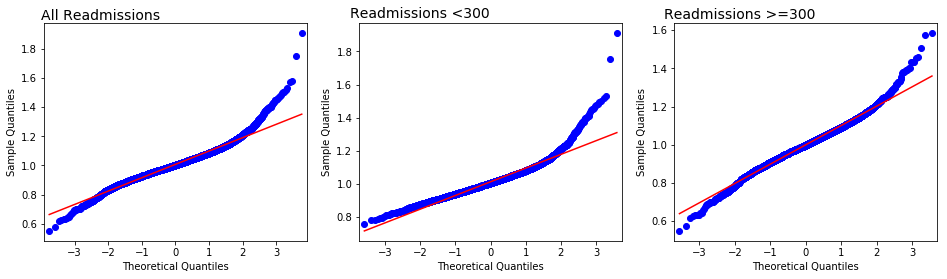

In [44]:
# check normality of distributions
print('Visual inspection of approximately normal condition')
fig = plt.figure(figsize=(16,4))
left = -4   #x coordinate for text insert

# all
ax = fig.add_subplot(1, 3, 1)
sm.qqplot(y, line='s', ax=ax)
top = ax.get_ylim()[1] * 1.05
txt = ax.text(left, top, 'All Readmissions', verticalalignment='top', fontsize=14)

# <300
ax = fig.add_subplot(1, 3, 2)
sm.qqplot(l300, line='s', ax=ax)
top = ax.get_ylim()[1] * 1.05
txt = ax.text(left, top, 'Readmissions <300', verticalalignment='top', fontsize=14)

# >=300
ax = fig.add_subplot(1, 3, 3)
sm.qqplot(g300, line='s', ax=ax)
top = ax.get_ylim()[1] * 1.05
txt = ax.text(left, top, 'Readmissions >=300', verticalalignment='top', fontsize=14)

plt.show()

Visual inspection of constant variance


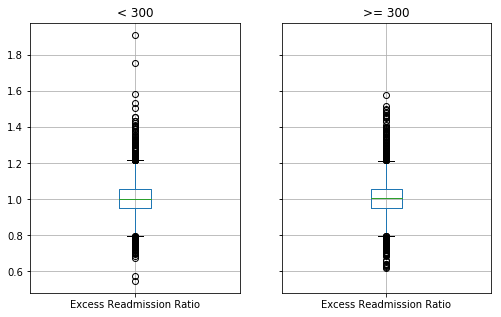

In [45]:
# variability should be consistent across groups (homoscedastic)
print('Visual inspection of constant variance')
df_300[[ 'Excess Readmission Ratio', 'Category']].groupby('Category').boxplot(return_type='axes', figsize=(8,5));

# Comparisons must be made using ANOVA. The groups to be considered are hospitals with fewer than 100 discharges, hospitals with more than 1000 discharges, and all others.

Conditions for ANOVA
Independence Since no hospital appears more than one group, independence can be assumed.
Near normality for each group.

C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'High Discharges (> 1000) Histogram')

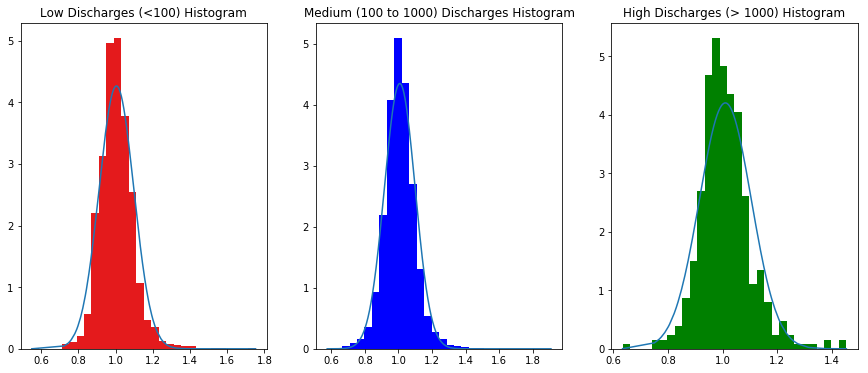

In [46]:
#Normtests and qqplots

# creating dataframes for each of the groups
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]
low = df[(df['Number of Discharges'] < 100)]
high = df[(df['Number of Discharges'] > 1000)]
mid = df[(df['Number of Discharges'] < 1000) & (df['Number of Discharges'] > 100)]

# testing normality conditions
lowd = sorted(low['Excess Readmission Ratio'])
highd = sorted(high['Excess Readmission Ratio'])
midd = sorted(mid['Excess Readmission Ratio'])

#Plotting to check normality for each subpopulation

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1,3,1)
mu_low = np.average(lowd)
sigma_low = np.std(lowd)
fit = stats.norm.pdf(lowd, mu_low, sigma_low)
ax1.plot(lowd, fit)
ax1.hist(lowd, 30, normed=True,color='#e41a1c')
ax1.set_title("Low Discharges (<100) Histogram")

ax2 = fig.add_subplot(1,3,2)
mu_mid = np.average(midd)
sigma_mid = np.std(midd)
fit = stats.norm.pdf(midd, mu_mid, sigma_mid)
ax2.plot(midd, fit)
ax2.hist(midd, 30, normed=True,color='blue')
ax2.set_title("Medium (100 to 1000) Discharges Histogram")

ax3 = fig.add_subplot(1,3,3)
mu_high = np.average(highd)
sigma_high= np.std(highd)
fit = stats.norm.pdf(highd, mu_high, sigma_high)
ax3.plot(highd, fit)
ax3.hist(highd, 30, normed=True,color='green')
ax3.set_title("High Discharges (> 1000) Histogram")

The data looks more or less normally distributed in all three cases. And we can also say 
that the three subpopulations are independent because they are all different hospitals. 
Hence, we can apply ANOVA to check for a significant difference in difference.

In [47]:
#ANOVA test
f_statistic, p_value = stats.f_oneway(lowd, highd, midd)
print( 'f value : ', f_statistic)
print( 'p value : ', p_value)

f value :  0.8866907883731115
p value :  0.4120452202177711


The p-value from the test is extremely small. This implies that we can reject the null hypothesis. 
The null hypothesis was that difference in means of excess readmission ratios among the three 
subpopulations is significant. Hence, there is a significant difference which cannot be attributed to randomness. 
Therefore, we should probably look into other variables or columns that might influence excess readmissions.
